# 5-1 卷積神經網路 CNN

### 程式 5.1 初始化一個小型卷積神經網路 (convnet)

# 5-2 以少量資料集從頭訓練一個卷積神經網路

### 程式 5.4 複製圖片到訓練、驗證和測試集目錄

In [37]:
import os, shutil

# 解壓縮資料夾所在的目錄路徑
original_dataset_dir_dogs = r'F:\python巨匠上課用\巨匠練習題\dogvscat\train' 
original_dataset_dir_cats = r'C:\Users\User\Desktop\python\archive\PetImages\Cat'
# 用來儲存少量資料集的目錄位置
base_dir = r'F:\python巨匠上課用\巨匠練習題\dogvscat\train\image' 
if not os.path.isdir(base_dir): os.mkdir(base_dir)  # 如果目錄不存在, 才建立目錄

# 分拆成訓練、驗證與測試目錄位置
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')  
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir): 
    os.mkdir(train_cats_dir) # 用來訓練貓圖片的目錄位置

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir): 
    os.mkdir(train_dogs_dir) # 用來訓練狗圖片的目錄位置

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir): 
    os.mkdir(validation_cats_dir) # 用來驗證貓圖片的目錄位置

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir): 
    os.mkdir(validation_dogs_dir) # 用來驗證狗圖片的目錄位置

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir): 
    os.mkdir(test_cats_dir) # 用來測試貓圖片的目錄位置

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir): 
    os.mkdir(test_dogs_dir) # 用來測試狗圖片的目錄位置




# 複製前面 1000 張貓圖片到 train_cats_dir 訓練目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 validation_cats_dir 驗證目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 test_cats_dir 測試目錄
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 複製前面 1000 張狗圖片到 train_dogs_dir 訓練目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 validation_dogs_dir 驗證目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張狗圖片到 test_dogs_dir 測試目錄
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('複製完成')

複製完成


### 我們計算每個訓練/驗證/測試分組中的圖片數量，做為資料完整性的檢查：

In [38]:
print('訓練用的貓照片張數:', len(os.listdir(train_cats_dir)))
print('訓練用的狗照片張數:', len(os.listdir(train_dogs_dir)))
print('驗證用的貓照片張數:', len(os.listdir(validation_cats_dir)))
print('驗證用的狗照片張數:', len(os.listdir(validation_dogs_dir)))
print('測試用的貓照片張數:', len(os.listdir(test_cats_dir)))
print('測試用的狗照片張數:', len(os.listdir(test_dogs_dir)))

訓練用的貓照片張數: 1000
訓練用的狗照片張數: 1000
驗證用的貓照片張數: 500
驗證用的狗照片張數: 500
測試用的貓照片張數: 500
測試用的狗照片張數: 500


### 程式 5.5 為狗 vs. 貓分類實作的一個小型的卷積神經網路

In [32]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 17, 17, 128)      

### 程式 5.6 配置 model 以進行訓練

In [39]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### 程式 5.7 使用 ImageDataGenerator 產生器從目錄中讀取影像

In [40]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #設定訓練、測試資料的 Python 產生器，並將圖片像素值依 1/255 比例重新壓縮到 [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # 目標目錄
    target_size=(150, 150),  # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='binary')    # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 看看產生器的輸出結果

In [41]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### 程式 5.8 調整 model 以使用批次量產生器

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 43s 419ms/step - loss: 0.6970 - acc: 0.4745 - val_loss: 0.6935 - val_acc: 0.4970
Epoch 2/30
 64/100 [==================>...........] - ETA: 13s - loss: 0.6940 - acc: 0.4906

KeyboardInterrupt: 

In [42]:
from PIL import Image
import os

original_dataset_dir_dogs = r'F:\python巨匠上課用\巨匠練習題\dogvscat\train\image\train\dogs' 
original_dataset_dir_cats = r'F:\python巨匠上課用\巨匠練習題\dogvscat\train\image\train\cats'

def find_unreadable_images(folder_path):
    unreadable_images = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # 檢驗圖片是否完整
        except (IOError, SyntaxError) as e:
            unreadable_images.append(filename)

    return unreadable_images

folder_path = original_dataset_dir_dogs
unreadable_images = find_unreadable_images(folder_path)

if len(unreadable_images) > 0:
    print("無法讀取的圖片：")
    for img in unreadable_images:
        print(img)
else:
    print("所有圖片都可以讀取。")

所有圖片都可以讀取。


### 程式 5.9 儲存model

In [ ]:
model.save('cats_and_dogs_small_1.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 程式 5.10 顯示訓練和驗證週期的損失值和準確度曲線

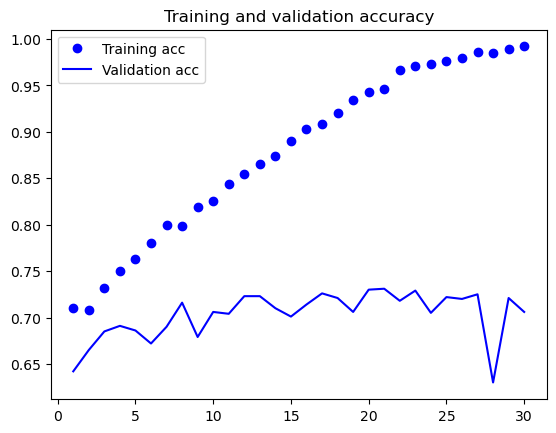

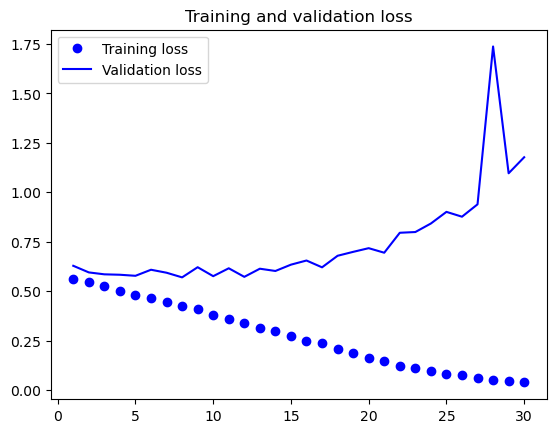

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 程式 5.11 透過 ImageDataGenerator 設定資料擴增

In [43]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

### 程式 5.12 顯示一些隨機擴充的訓練影像

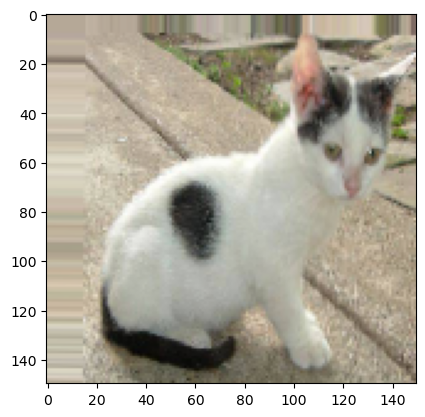

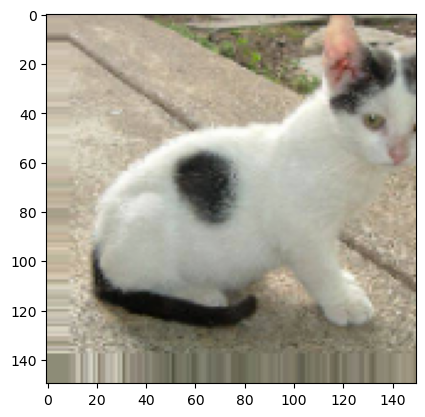

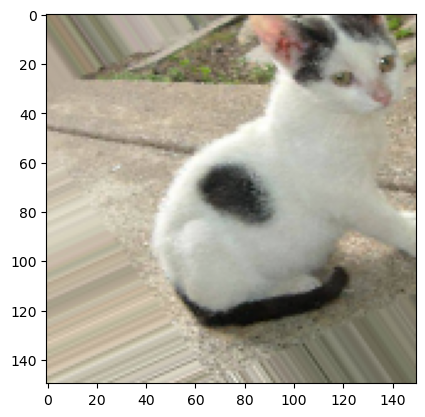

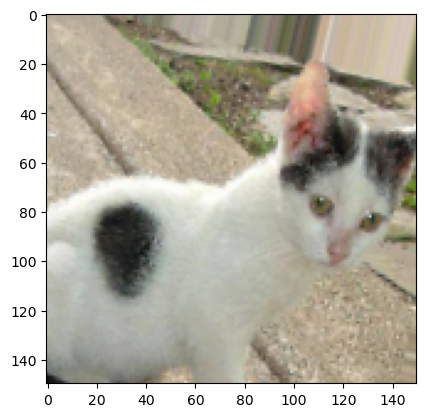

In [44]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### 程式 5.13 定義具有 Dropout 層的新卷積神經網路

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #  在這裡加入 Dropout 層 (丟棄 50 %)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


### 程式 5.14 使用資料擴增產生器來訓練卷積神經網路

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
    train_dir,    # 目標目錄
    target_size=(150, 150), # 所有圖像大小調整成 150×150
    batch_size=32,
    class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# 訓練
history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=150,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/150
30/30 [==============================] - 38s 1s/step - loss: 0.7029 - acc: 0.5021 - val_loss: 0.6901 - val_acc: 0.5690
Epoch 2/150
30/30 [==============================] - 22s 727ms/step - loss: 0.6901 - acc: 0.5417
Epoch 3/150
30/30 [==============================] - 23s 767ms/step - loss: 0.6888 - acc: 0.5477
Epoch 4/150
30/30 [==============================] - 20s 666ms/step - loss: 0.6832 - acc: 0.5552
Epoch 5/150
30/30 [==============================] - 20s 652ms/step - loss: 0.6787 - acc: 0.5583
Epoch 6/150
30/30 [==============================] - 19s 628ms/step - loss: 0.6647 - acc: 0.5985
Epoch 7/150
30/30 [==============================] - 23s 746ms/step - loss: 0.6740 - acc: 0.5625
Epoch 8/150
30/30 [==============================] - 19s 638ms/step - loss: 0.6650 - acc: 0.5858
Epoch 9/150
30/30 [==============================] - 19s 636ms/step - loss: 0.6621 - acc: 0.6059
Epoch 10/

Epoch 80/150
30/30 [==============================] - 21s 709ms/step - loss: 0.5222 - acc: 0.7479
Epoch 81/150
30/30 [==============================] - 21s 706ms/step - loss: 0.4981 - acc: 0.7659
Epoch 82/150
30/30 [==============================] - 24s 782ms/step - loss: 0.5242 - acc: 0.7331
Epoch 83/150
30/30 [==============================] - 22s 715ms/step - loss: 0.4880 - acc: 0.7719
Epoch 84/150
30/30 [==============================] - 21s 710ms/step - loss: 0.5018 - acc: 0.7646
Epoch 85/150
30/30 [==============================] - 22s 714ms/step - loss: 0.5187 - acc: 0.7415
Epoch 86/150
30/30 [==============================] - 22s 721ms/step - loss: 0.5427 - acc: 0.7302
Epoch 87/150
30/30 [==============================] - 21s 708ms/step - loss: 0.5125 - acc: 0.7458
Epoch 88/150
30/30 [==============================] - 22s 731ms/step - loss: 0.5132 - acc: 0.7500
Epoch 89/150
30/30 [==============================] - 22s 715ms/step - loss: 0.5216 - acc: 0.7362
Epoch 90/150
30/30 [

### 程式 5.15 儲存 model

In [50]:
model.save('cats_and_dogs_small_3.h5')

### 再次顯示訓練和驗證週期的損失值和準確度曲線

In [24]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

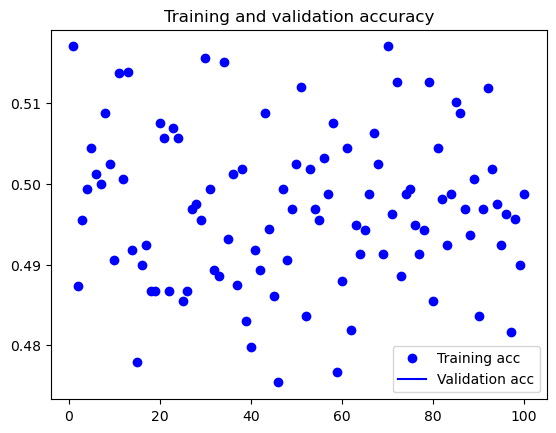

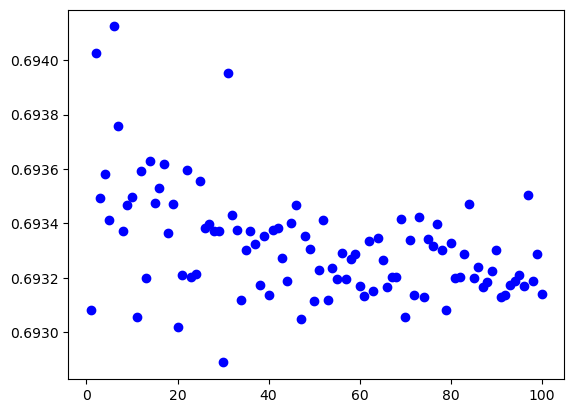

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(100, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 程式 5.20 繪製結果

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

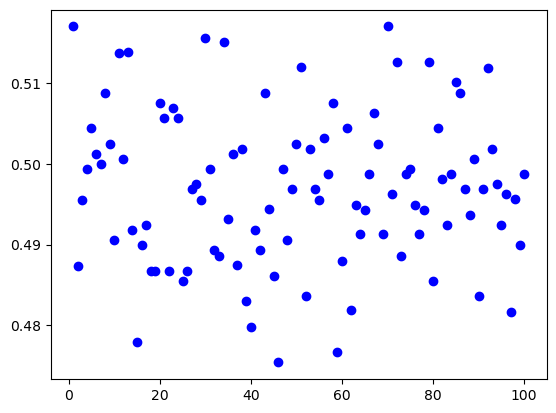

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
""" 若你的 Keras 版本執行程式 5.23 後的結果與書上有所差異，請將程式 5.23 做以下的修改

這邊提供 2 種修改方式：

方式 1. 將 conv_base.trainable = False  註解掉。

方式 2. 餵給 VGG16 的圖片像素值不要壓到 0-1 之間，將 rescale=1./255 都註解掉，在程式 5.23 中做以下的修改：

from keras.applications.imagenet_utils import preprocess_input  # 新增這行

train_gen = ImageDataGenerator(
#     rescale=1.0/255,                       # 註解這行
    preprocessing_function=preprocess_input, # 新增這行
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='nearest'
)
#test_datagen = ImageDataGenerator(1./255)                                 # 註解這行
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # 新增這行

"""

#### 繪製結果

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

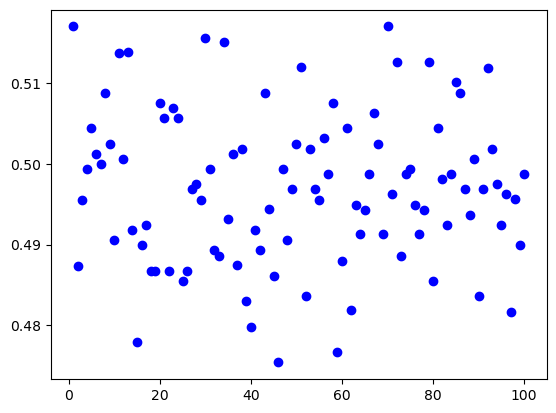

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()